<a href="https://colab.research.google.com/github/ljime080/CAP4630_Final_Project/blob/jayvee/LSTMBidirectional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loaded 1255 days of TSLA data
                                 Open        High         Low       Close  \
Date                                                                        
2025-04-01 00:00:00-04:00  263.799988  277.450012  259.250000  268.459991   
2025-04-02 00:00:00-04:00  254.600006  284.989990  251.270004  282.760010   
2025-04-03 00:00:00-04:00  265.290009  276.299988  261.510010  267.279999   
2025-04-04 00:00:00-04:00  255.380005  261.000000  236.000000  239.429993   
2025-04-07 00:00:00-04:00  223.779999  252.000000  214.250000  233.289993   

                              Volume  
Date                                  
2025-04-01 00:00:00-04:00  146486900  
2025-04-02 00:00:00-04:00  212787800  
2025-04-03 00:00:00-04:00  136174300  
2025-04-04 00:00:00-04:00  180324400  
2025-04-07 00:00:00-04:00  179476392  


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_1 (Bidirectional)      │ (None, 256)                 │         133,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 133,377 (521.00 KB)

 Trainable params: 133,377 (521.00 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - loss: 0.0816
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 0.0021
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0015
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0021
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 0.0010
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 0.0011
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0014
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 8.9611e-04
Epoch 9/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - loss: 8.4010e-04
Epoch 10/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 8.9802e-04
Epoch 11/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 7.4871e-04
Epoch 12/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 7.2886e-04
Epoch 13/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - loss: 7.3849e-04
Epoch 14/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 8.2506e-04
Epoch 15/50
38/38 ━━━━━━━━━━━━━━━━━━━━

KeyError: 'val_loss'

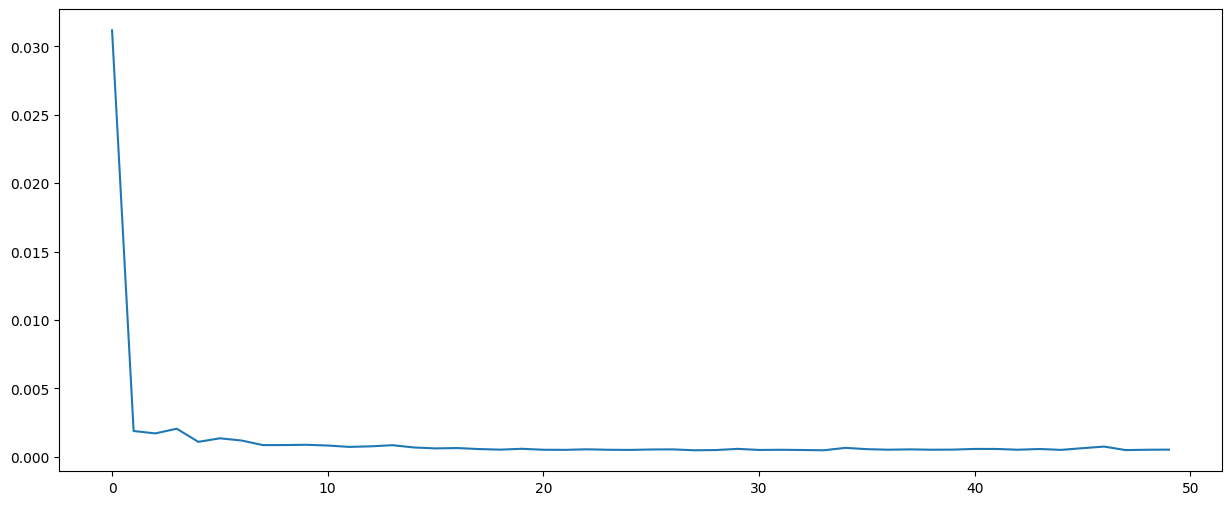

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional
from tensorflow.keras.optimizers import Adam
from datetime import datetime, timedelta

# Fetch TSLA stock data
def fetch_tesla_data():
    # Get today's date
    end_date = datetime.today()
    # Start date 5 years back (adjust as needed)
    start_date = end_date - timedelta(days=5*365)

    # Download TSLA data
    tsla = yf.Ticker("TSLA")
    df = tsla.history(start=start_date, end=end_date)

    # Keep only relevant columns
    df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
    return df

# Prepare data for LSTM
def prepare_data(data, target_col='Close', n_steps=30):
    # Extract target variable
    target = data[[target_col]].values

    # Scale data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(target)

    # Create sequences
    X, y = [], []
    for i in range(n_steps, len(scaled_data)):
        X.append(scaled_data[i-n_steps:i, 0])
        y.append(scaled_data[i, 0])

    return np.array(X), np.array(y), scaler

# Build LSTM Bidirectional model
def build_bilstm_model(n_steps, n_features):
    model = Sequential()
    model.add(Bidirectional(LSTM(128, return_sequences=False), input_shape=(n_steps, n_features)))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
    return model

#def plot_training_loss(history):
    #plt.figure(figsize=(12, 6))
    #plt.plot(history.history['loss'], label='Training Loss')
    #plt.plot(history.history['val_loss'], label='Validation Loss')
    #plt.title('Training Loss')
    #plt.xlabel('Epoch')
    #plt.ylabel('Loss')
    #plt.legend()
    #plt.show()

# Main execution
def main():
    # Fetch TSLA data
    tsla_data = fetch_tesla_data()
    print(f"Loaded {len(tsla_data)} days of TSLA data")
    print(tsla_data.tail())

    # Parameters
    n_steps = 30  # Using 30 days of history to predict next day
    test_size = 30  # Last 30 days for testing
    n_features = 1

    # Prepare data
    X, y, scaler = prepare_data(tsla_data, n_steps=n_steps)

    # Split into train/test (last 30 days for testing as in the paper)
    X_train, X_test = X[:-test_size], X[-test_size:]
    y_train, y_test = y[:-test_size], y[-test_size:]

    # Reshape for LSTM [samples, timesteps, features]
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))

    # Build and train model
    model = build_bilstm_model(n_steps, n_features)
    print(model.summary())

    history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

    # Predictions
    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)

    # Inverse scaling
    train_predict = scaler.inverse_transform(train_predict)
    y_train = scaler.inverse_transform([y_train])
    test_predict = scaler.inverse_transform(test_predict)
    y_test = scaler.inverse_transform([y_test])

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train[0], train_predict[:,0]))
    test_rmse = np.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
    print(f'Train RMSE: {train_rmse:.2f}')
    print(f'Test RMSE: {test_rmse:.2f}')

    # Plot results
    plt.figure(figsize=(15,6))

    # Create date indices for plotting
    train_dates = tsla_data.index[n_steps:-test_size]
    test_dates = tsla_data.index[-test_size:]


    # Plot training data predictions
    plt.plot(train_dates, y_train[0], label='Historical Price', color='blue', alpha=0.5)
    plt.plot(train_dates, train_predict[:,0], label='Training Predictions', color='green', alpha=0.7)

    plt.title('TSLA Stock Price Training Data with Bidirectional LSTM')
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot test data predictions
    plt.plot(test_dates, y_test[0], label='True Test Price', color='blue')
    plt.plot(test_dates, test_predict[:,0], label='Test Predictions', color='red')

    plt.title('TSLA Stock Price Prediction with Bidirectional LSTM')
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == '__main__':
    main()